La prueba de Grubbs de puede aplicar a conjuntos de datos numéricos UNIVARIANTES y con distribución normal

https://www.youtube.com/watch?v=KGWbbAUcC0I&ab_channel=BhaveshBhatt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

In [2]:
%matplotlib inline

In [27]:
y = np.random.random(100)
x = np.arange(len(y))
y

array([0.83928687, 0.67306393, 0.78385182, 0.35822662, 0.414897  ,
       0.92102217, 0.87220683, 0.78635895, 0.71775606, 0.54405927,
       0.00945936, 0.75648075, 0.77850781, 0.20348398, 0.12967057,
       0.75423306, 0.80363673, 0.41705099, 0.15343035, 0.91090012,
       0.97820868, 0.84304473, 0.20398106, 0.95668952, 0.6314331 ,
       0.87392268, 0.5466608 , 0.9004991 , 0.11343292, 0.15271183,
       0.97943399, 0.84868778, 0.03813741, 0.54227263, 0.88938382,
       0.88316749, 0.30107278, 0.15565755, 0.91697389, 0.87084259,
       0.04929039, 0.8835383 , 0.78407798, 0.90237334, 0.10429517,
       0.30561916, 0.38040633, 0.8511027 , 0.60466591, 0.93282743,
       0.74260866, 0.93458254, 0.29065369, 0.12059344, 0.1028314 ,
       0.24489939, 0.38235979, 0.29233783, 0.96171877, 0.72530888,
       0.73625144, 0.00192976, 0.23043958, 0.11441087, 0.17468611,
       0.71781227, 0.72637632, 0.32362412, 0.11356814, 0.23874133,
       0.89670194, 0.02097506, 0.93941575, 0.13934973, 0.80914

In [28]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [29]:
print(max(y),min(y))

0.9963113516455002 0.0019297565572488073


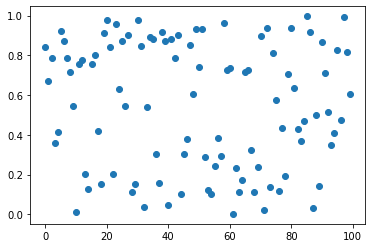

In [30]:
plt.scatter(x,y)

In [31]:
#Inputación de outliers
y[14] = 9
y[83] = 10
y

array([8.39286865e-01, 6.73063929e-01, 7.83851821e-01, 3.58226623e-01,
       4.14897005e-01, 9.21022175e-01, 8.72206833e-01, 7.86358954e-01,
       7.17756062e-01, 5.44059268e-01, 9.45935776e-03, 7.56480754e-01,
       7.78507813e-01, 2.03483979e-01, 9.00000000e+00, 7.54233064e-01,
       8.03636733e-01, 4.17050994e-01, 1.53430352e-01, 9.10900124e-01,
       9.78208679e-01, 8.43044730e-01, 2.03981061e-01, 9.56689525e-01,
       6.31433098e-01, 8.73922682e-01, 5.46660799e-01, 9.00499095e-01,
       1.13432919e-01, 1.52711833e-01, 9.79433995e-01, 8.48687781e-01,
       3.81374142e-02, 5.42272633e-01, 8.89383815e-01, 8.83167490e-01,
       3.01072782e-01, 1.55657551e-01, 9.16973895e-01, 8.70842594e-01,
       4.92903894e-02, 8.83538304e-01, 7.84077984e-01, 9.02373344e-01,
       1.04295168e-01, 3.05619163e-01, 3.80406333e-01, 8.51102699e-01,
       6.04665908e-01, 9.32827429e-01, 7.42608660e-01, 9.34582538e-01,
       2.90653691e-01, 1.20593439e-01, 1.02831402e-01, 2.44899387e-01,
      

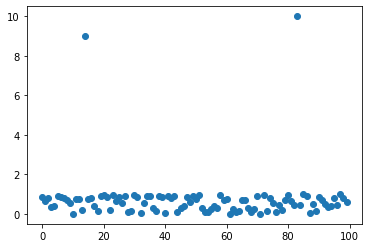

In [32]:
plt.scatter(x,y)

In [12]:
#Funcion para calcular las características G
def grubbs_stat(y):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    Gcal = max_of_deviations / std_dev
    print ("Grubbs Statistics value: {}".format(Gcal))
    return Gcal,max_ind

In [13]:
def calculate_critical_value(size,alpha):
    t_dist = stats.t.ppf(1 - alpha / (2* size),size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Grubbs critical value: {}".format(critical_value))
    return critical_value

In [14]:
def check_G_values(Gs, Gc, inp, max_index):
    if Gs > Gc:
        print("{} is an outlier. G > G-critical: {:.4f} > {:.4f} \n".format(inp[max_index], Gs, Gc))
    else:
        print("{} is not an outlier. G > G-critical: {:.4f} > {:.4f} \n".format(inp[max_index],Gs,Gc))

In [15]:
#PARAMETROS: VECTOR NUMERICO CON LOS DATOS A ANALIZAR, ALPHA = NIVEL DE SIGNIFICANCIA DEL TEST, NUMERO MAXIMO DE OUTLIERS A DETECTAR
def ESD_Test(input_series, alpha, max_outliers):
    for iterations in range (max_outliers):
        Gcritical = calculate_critical_value(len(input_series), alpha)
        Gstat, max_index = grubbs_stat(input_series)
        check_G_values(Gstat, Gcritical, input_series, max_index)
        input_series = np.delete(input_series, max_index)

In [33]:
#se muestran 3 iteraciones en las cuales si el valor crítico de grubbs es mayor al estadistico de grubbs, es un outlier
ESD_Test(y,0.05,3)

Grubbs critical value: 3.384082902288351
Grubbs Statistics value: 7.170119979648035
10.0 is an outlier. G > G-critical: 7.1701 > 3.3841 

Grubbs critical value: 3.380650508067058
Grubbs Statistics value: 9.282795749893369
9.0 is an outlier. G > G-critical: 9.2828 > 3.3807 

Grubbs critical value: 3.377175980782947
Grubbs Statistics value: 1.7718614659288172
0.0019297565572488073 is not an outlier. G > G-critical: 1.7719 > 3.3772 



In [34]:
ESD_Test(y,0.05,10)

Grubbs critical value: 3.384082902288351
Grubbs Statistics value: 7.170119979648035
10.0 is an outlier. G > G-critical: 7.1701 > 3.3841 

Grubbs critical value: 3.380650508067058
Grubbs Statistics value: 9.282795749893369
9.0 is an outlier. G > G-critical: 9.2828 > 3.3807 

Grubbs critical value: 3.377175980782947
Grubbs Statistics value: 1.7718614659288172
0.0019297565572488073 is not an outlier. G > G-critical: 1.7719 > 3.3772 

Grubbs critical value: 3.3736583400522497
Grubbs Statistics value: 1.7862848169431325
0.009459357761924969 is not an outlier. G > G-critical: 1.7863 > 3.3737 

Grubbs critical value: 3.370096570986626
Grubbs Statistics value: 1.7886802389635454
0.020975058974666894 is not an outlier. G > G-critical: 1.7887 > 3.3701 

Grubbs critical value: 3.3664896240676505
Grubbs Statistics value: 1.7989176742155555
0.03014695295972014 is not an outlier. G > G-critical: 1.7989 > 3.3665 

Grubbs critical value: 3.362836413028039
Grubbs Statistics value: 1.8137703206285352
0.

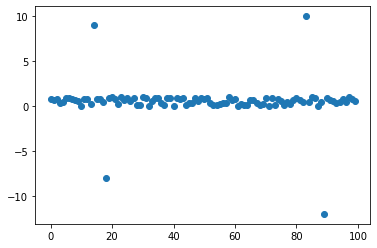

In [37]:
plt.scatter(x,y)

In [35]:
y[18] = -8
y[89] = -12

In [39]:
ESD_Test(y,0.05,10)

Grubbs critical value: 3.384082902288351
Grubbs Statistics value: 6.262230882581157
-12.0 is an outlier. G > G-critical: 6.2622 > 3.3841 

Grubbs critical value: 3.380650508067058
Grubbs Statistics value: 5.973651899141396
10.0 is an outlier. G > G-critical: 5.9737 > 3.3807 

Grubbs critical value: 3.377175980782947
Grubbs Statistics value: 6.836694687661131
-8.0 is an outlier. G > G-critical: 6.8367 > 3.3772 

Grubbs critical value: 3.3736583400522497
Grubbs Statistics value: 9.20608110313532
9.0 is an outlier. G > G-critical: 9.2061 > 3.3737 

Grubbs critical value: 3.370096570986626
Grubbs Statistics value: 1.8129590573658294
0.0019297565572488073 is not an outlier. G > G-critical: 1.8130 > 3.3701 

Grubbs critical value: 3.3664896240676505
Grubbs Statistics value: 1.8304052542175089
0.009459357761924969 is not an outlier. G > G-critical: 1.8304 > 3.3665 

Grubbs critical value: 3.362836413028039
Grubbs Statistics value: 1.8359499486276756
0.020975058974666894 is not an outlier. G >

https://statologos.jaol.net/grubbs-test-python/

In [8]:
from outliers import smirnov_grubbs as grubbs
import numpy as np
import pandas as pd

In [16]:
datos = np.array([-70, 5, 14, 15, 15, 14, 19, 17, 16,-60, 20, 22, 8, 21, 28, 11, 9, 29, 40])

In [17]:
#Prueba de grubbs detectando valores atípicos por ambos lados
grubbs.test(datos,alpha = 0.05)

array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29])

In [26]:
#Prueba de grubss unilateral, detecta el valor mínimo y el máximod el conjunto de datos
datos1 = np.array ([5, 14,-100, 15, 15, 14, 19, 17, 16, 20, 22, 8, 21, 28, 11, 9, 29, 40])

In [27]:
#Retorna el indice del valor outlier de menor valor, en caso de no existir outliers no arrroja nada, tampoco el menor valor del conjunto numerico
grubbs.min_test_indices(datos1,alpha = 0.05)

[2]

In [28]:
#Retorna el índice del outlier de valor máximo, si no hay outliers no retorna el indice del mayor valor del conjunto, en dicho caso no retorna nada
grubbs.max_test_indices(datos1,alpha = 0.05)

[]

In [57]:
datos3 = np.array ([5, 14, 15, 15, 14,19, 17, 16, 20, 22, 8, 21, 28, 11, 9, 29, 40,90])

In [42]:
#Quita el outlier de valor máximo
grubbs.max_test(datos3,alpha = 0.05)

array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29])

In [43]:
#quita el outlier de valor mínimo
grubbs.min_test(datos3,alpha = 0.05)

array([ 5, 14, 15, 15, 14, 19, 17, 16, 20, 22,  8, 21, 28, 11,  9, 29, 40])

In [58]:
#Como extraer el valor de LOS outliers encontrados maximos, si no hay no retorna nada
grubbs.max_test_outliers(datos3,alpha = 0.05)

[90, 40]

In [59]:
datos4 = np.array ([5, 14, 15, 15, 14,19,-1000,-1090, 17, 16, 20, 22, 8, 21, 28, 11, 9, 29, 40,90])

In [62]:
#Como extraer los valores de los outliers mínimos
grubbs.min_test_outliers(datos4,alpha = 0.05)

[-1090, -1000]